# Random Forest
Build a random forest to predict the quality of github profiles

In [1]:
#imports
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

path = '/Users/conorosully/Google Drive/Medium/GitRater/Figures/'

In [2]:
#Read dataset
data = pd.read_csv('../data/gitrater.csv',index_col=0)
print(len(data))
data.head()

230


,repos,stars,followers,following,foll_ratio,lang,n_lang,org_flag,n_cont,last_cont,stab_cont,cont_repo_ratio,r1,r2,y
0,71,306,106,9,11.78,"['JavaScript', 'PHP', 'CSS', 'Ruby', 'Shell', ...",10,1,437,0,0.25,6.15,3.5,4.5,4.0
1,0,0,0,1,0.00,[],0,0,1,159,0.00,0.00,0.0,0.0,0.0
2,12,1,182,0,-1.00,"['JavaScript', 'PHP', 'CSS', 'Ruby', 'Shell']",5,0,433,3,0.23,36.08,4.0,3.0,3.5
3,13,31,0,17,0.00,"['PHP', 'HTML', 'JavaScript']",3,0,20,0,0.50,1.54,2.0,2.0,2.0
4,99,344,370,16,23.12,"['C', 'JavaScript', 'Go', 'CMake', 'Jupyter No...",10,0,255,6,0.02,2.58,5.0,3.0,4.0


In [9]:
features = ['repos','stars','followers','following','foll_ratio','n_lang','org_flag','n_cont','last_cont','stab_cont','cont_repo_ratio']
X = data[features]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30,random_state = 100)

# Fitting the model
rf = RandomForestRegressor(max_depth = 4).fit(X_train,y_train)

0.2690838064291963


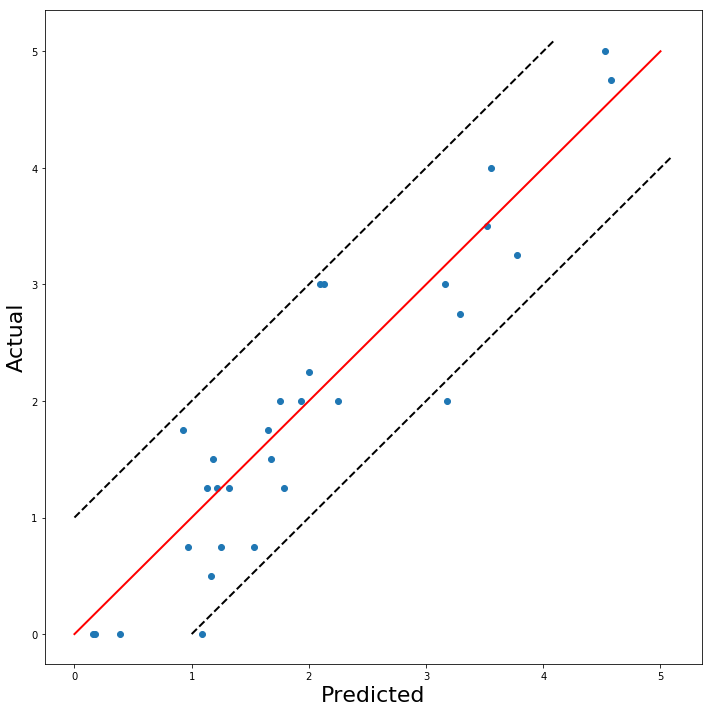

In [10]:
# Get predictions
predictions = rf.predict(X_test)

# Calculate MSE 
print(mean_squared_error(y_test,predictions))

# Plot of actual vs predicted 
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
plt.plot(predictions,y_test,'o')
plt.plot([0, 4.1], [1, 5.1], color='black',linestyle='--', lw=2)
plt.plot([0, 5], [0, 5], 'r-', lw=2)
plt.plot([1, 5.1], [0, 4.1], color='black',linestyle='--', lw=2)
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

plt.tight_layout()
plt.savefig(path + 'rf_fit.png',format='png',dpi=150)

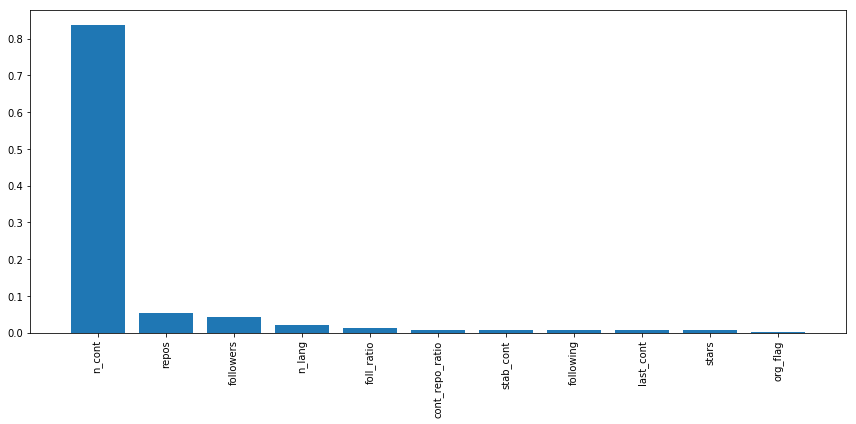

In [12]:
# Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
labels = [features[i] for i in indices]

plt.figure(figsize=(12, 6), facecolor='w', edgecolor='k')
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(ticks=range(X.shape[1]), labels=labels,rotation=90)
plt.xlim([-1, X.shape[1]])

plt.tight_layout()
plt.savefig(path + 'rf_importances.png',format='png',dpi=150)